# Plot histograms of VISION output

In [1]:
# IMPORT LIBRARIES
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,LatitudeLocator, LongitudeLocator)
import os
import cf
import numpy as np
import numpy.ma as ma
from datetime import datetime


In [2]:
# SELECT OPTIONS HERE
outdir='/home/vagrant/Plots/'
select_species='O3'
# Select specific start/end year for the analysis (if required)
l_subset_time=False ; start_t='2015-01-01' ; end_t='2020-12-31'
# Select latitudes and altitudes for the analysis (if required).
l_subset_lats= False ; selected_lats= [30,60]     
l_subset_alts= False ; selected_alts=[5000,10000] # units = m

In [3]:
# READ AND PROCESS FAAM DATA

# Define variables for FAAM data
source1='FAAM'
sourcedir1='/home/vagrant/Tutorials/UMvn13.9/data/Task16/FAAM_ozone_cf_compliant_2010_2020/'
slabel1='FAAM O3 '
vunits1=' (ppbv)'
vfactor1=1.
vmin1=3. # removes negative values and very low values collected during taxiing

# Read and concatenate data
rdata1=cf.read(sourcedir1+'*.nc')
rdata1=rdata1.concatenate()

# Create label (for plot title) and filename (for output)
plot_title1 = source1+' '+select_species+' '

outfile1=outdir+source1+'_'+select_species

# If subsetting dataset update plot_title and filename accordingly

# Select specific times
if l_subset_time:
    time_spec=str(start_t[0:4])+'_'+str(end_t[0:4])
    plot_title1=plot_title1+' ('+str(start_t[0:5])+str(end_t[0:4])+')'
    outfile1=outfile1+'_'+time_spec
    rdata1 = rdata1.subspace(time=cf.wi(cf.dt(start_t), cf.dt(end_t)))

# Select altitudes
if l_subset_alts:
    alt_spec=str(selected_alts[0]/1000.)+'-'+str(selected_alts[1]/1000.)+'km'
    plot_title1=plot_title1 + ' for '+ alt_spec
    outfile1=outfile1+'_'+alt_spec
    rdata1 = rdata1.subspace(altitude=cf.wi(selected_alts[0], selected_alts[1]))

# Select latitudes    
if l_subset_lats:
    lat_spec=str(selected_lats[0])+':'+str(selected_lats[1])
    plot_title1=plot_title1 + ' [lats='+ lat_spec+']'
    outfile1=outfile1+'_'+lat_spec
    rdata1 = rdata1.subspace(latitude=cf.wi(selected_lats[0], selected_lats[1]))

# Apply conversion factors
rdata1.data=rdata1.data * vfactor1
# Remove values below a set minimum
if vmin1 is not None:
    rdata1=rdata1.where(rdata1.array <= vmin1, cf.masked)

# Extract coordinates
lat = rdata1.coordinate('latitude').array
lon = rdata1.coordinate('longitude').array
# Extract data
obs = rdata1.array

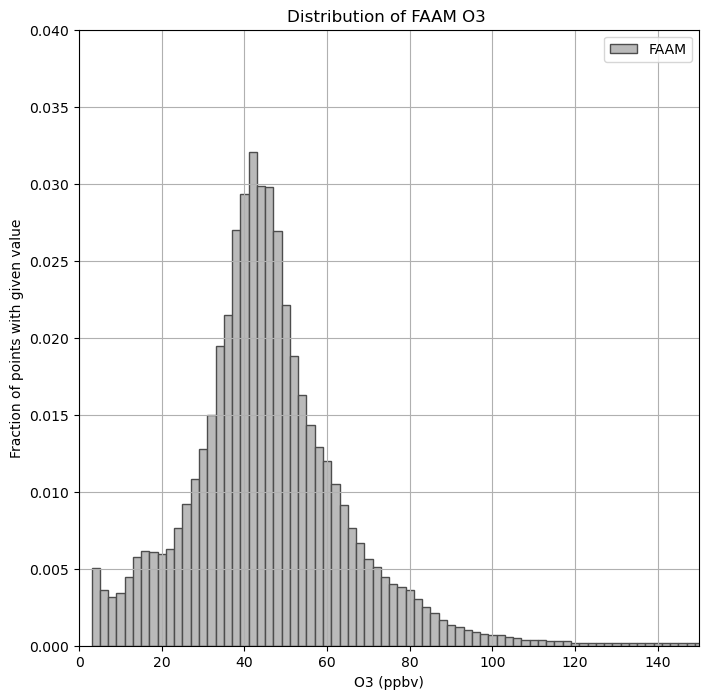

In [4]:
# PLOT HISTOGRAM OF FAAM OZONE (Probability distribution of ozone values)

# Define colours
greys=['#bababa','#878787','#4d4d4d','#1a1a1a'] #light to black

# Define figure and size
fig = plt.figure(figsize=(8, 8))

binsize = 2 #4 #0.5
binstart = 3
binend = 150

pdf, bins, patches = plt.hist(obs, bins=np.arange(binstart, binend + binsize, binsize), density=True,
        facecolor=greys[0],edgecolor=greys[2], linewidth=1, label=source1)

plt.xlabel(select_species + vunits1)
plt.ylabel('Fraction of points with given value')
plt.title('Distribution of '+plot_title1)
plt.xlim(0, 150)
plt.ylim(0,0.04)
plt.grid(True)
plt.legend(loc='upper right')

plt.savefig(outfile1+'_PDF.png',dpi=300,bbox_inches='tight')


In [5]:
# READ AND PROCESS UKCA DATA (COLOCATED ON FAAM FLIGHT TRACKS USING VISION)

# Define variables for UKCA data
source2='UKESM'
sourcedir2='/home/vagrant/Tutorials/UMvn13.9/data/Task16/UKCA_ozone_cf_compliant_2010_2020/'
slabel2='UKESM O3 '
vunits2=' (ppbv)'
vmin2=None
vfactor2=1.e9/1.657 # converts UKCA data (kg/kg) to ppbv 

# Read and concatenate data
rdata2=cf.read(sourcedir2+'*.nc')
rdata2=rdata2.concatenate()

# Create label (for plot title) and filename (for output)
plot_title2 = source2+' '+select_species+' '

outfile2=outdir+source2+'_'+select_species

# If subsetting dataset update plot_title and filename accordingly

# Select specific times
if l_subset_time:
    time_spec=str(start_t[0:4])+'_'+str(end_t[0:4])
    plot_title2=plot_title2+' ('+str(start_t[0:5])+str(end_t[0:4])+')'
    outfile2=outfile2+'_'+time_spec
    rdata2 = rdata2.subspace(time=cf.wi(cf.dt(start_t), cf.dt(end_t)))

# Select altitudes
if l_subset_alts:
    alt_spec=str(selected_alts[0]/1000.)+'-'+str(selected_alts[1]/1000.)+'km'
    plot_title2=plot_title2 + ' for '+ alt_spec
    outfile2=outfile2+'_'+alt_spec
    rdata2 = rdata2.subspace(altitude=cf.wi(selected_alts[0], selected_alts[1]))

# Select latitudes    
if l_subset_lats:
    lat_spec=str(selected_lats[0])+':'+str(selected_lats[1])
    plot_title2=plot_title2 + ' [lats='+ lat_spec+']'
    outfile2=outfile2+'_'+lat_spec
    rdata2 = rdata2.subspace(latitude=cf.wi(selected_lats[0], selected_lats[1]))

# Apply conversion factors
rdata2.data=rdata2.data * vfactor2
# Remove values below a set minimum
if vmin2 is not None:
    rdata2=rdata2.where(rdata2.array <= vmin2, cf.masked)

# Extract coordinates
lat = rdata2.coordinate('latitude').array
lon = rdata2.coordinate('longitude').array
# Extract data
mod = rdata2.array

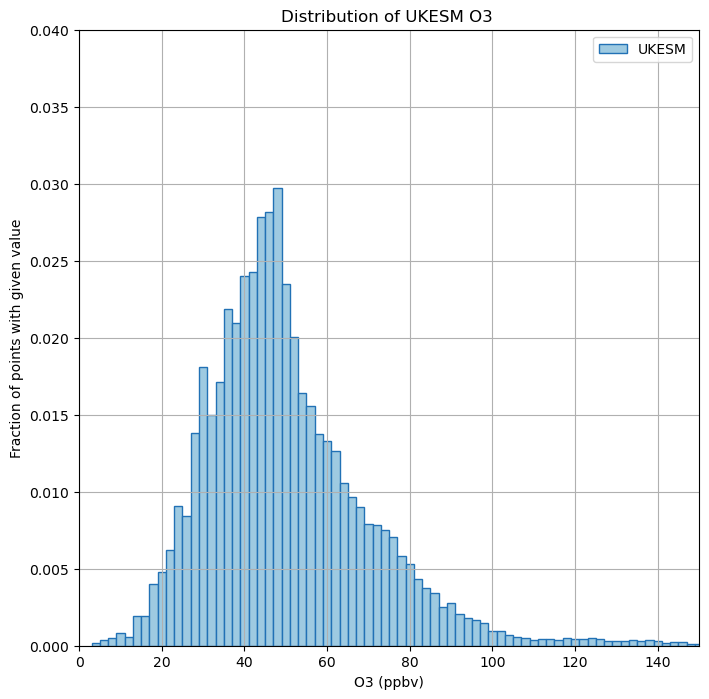

In [6]:
# PLOT HISTOGRAM OF FAAM OZONE (Probability distribution of ozone values)

# Define colours
blues= ['#9ecae1','#6baed6','#2171b5','#084594'] #light to black

# Define figure and size
fig = plt.figure(figsize=(8, 8))

binsize = 2 #4 #0.5
binstart = 3
binend = 150

pdf, bins, patches = plt.hist(mod, bins=np.arange(binstart, binend + binsize, binsize), density=True,
        facecolor=blues[0],edgecolor=blues[2], linewidth=1, label=source2)

plt.xlabel(select_species + vunits2)
plt.ylabel('Fraction of points with given value')
plt.title('Distribution of '+plot_title2)
plt.xlim(0, 150)
plt.ylim(0,0.04)
plt.grid(True)
plt.legend(loc='upper right')

plt.savefig(outfile2+'_PDF.png',dpi=300,bbox_inches='tight')

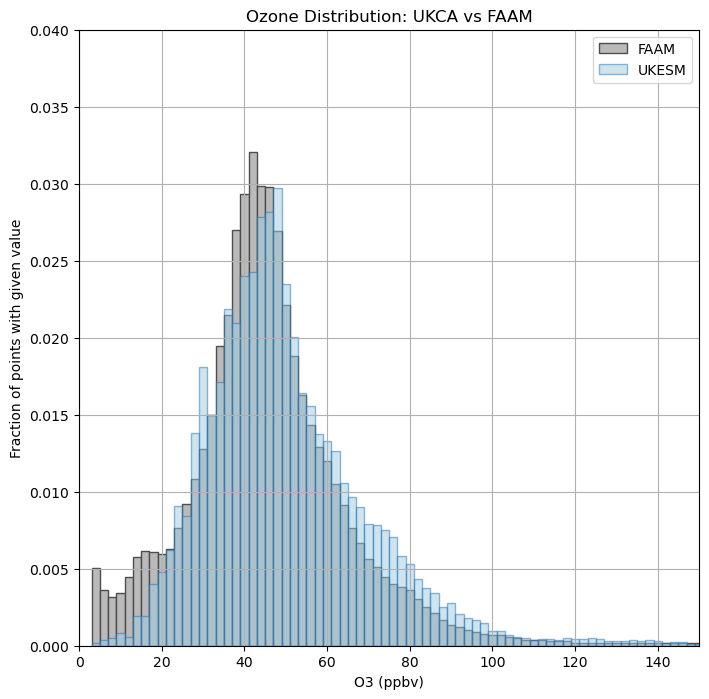

In [7]:
# PLOT BOTH HISTOGRAMS

# Define figure and size
fig = plt.figure(figsize=(8, 8))

binsize = 2 #4 #0.5
binstart = 3
binend = 150

pdf, bins, patches = plt.hist(obs, bins=np.arange(binstart, binend + binsize, binsize), density=True,
        facecolor=greys[0],edgecolor=greys[2], linewidth=1, label=source1)
pdf, bins, patches = plt.hist(mod, bins=np.arange(binstart, binend + binsize, binsize), density=True,
        alpha=0.5, facecolor=blues[0],edgecolor=blues[2], linewidth=1, label=source2)


plt.xlabel(select_species + vunits2)
plt.ylabel('Fraction of points with given value')
plt.title('Ozone Distribution: UKCA vs FAAM')
plt.xlim(0, 150)
plt.ylim(0,0.04)
plt.grid(True)
plt.legend(loc='upper right')

plt.savefig(outdir+source1+'_'+source2+'_'+select_species+'_PDF.png',dpi=300,bbox_inches='tight')

_Written by Maria Russo, 2025_